5.031.022-5, Guido Dinello

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Clasificación en las especies de los pingüinos

In [2]:
penguins = pd.read_csv("../../Data/penguins.csv")

### Clasificación de Gentoo vs el resto utilizando solamente una variable.

#### 1)

Crear una variable que valga 1 si el pingüino es Gentoo, 0 sino.

In [3]:
dummy_var = lambda x: 1 if x=="Gentoo" else 0

# agrego la columna con los datos de la nueva variable
new_var = penguins["species"].apply(dummy_var)
penguins_encoded = penguins.assign(Gentoo=new_var)

In [4]:
penguins_encoded.iloc[145:155,:]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Gentoo
145,Adelie,Dream,39.2,18.6,190,4250,male,2009,0
146,Adelie,Dream,36.6,18.4,184,3475,female,2009,0
147,Adelie,Dream,36.0,17.8,195,3450,female,2009,0
148,Adelie,Dream,37.8,18.1,193,3750,male,2009,0
149,Adelie,Dream,36.0,17.1,187,3700,female,2009,0
150,Adelie,Dream,41.5,18.5,201,4000,male,2009,0
151,Gentoo,Biscoe,46.1,13.2,211,4500,female,2007,1
152,Gentoo,Biscoe,50.0,16.3,230,5700,male,2007,1
153,Gentoo,Biscoe,48.7,14.1,210,4450,female,2007,1
154,Gentoo,Biscoe,50.0,15.2,218,5700,male,2007,1


Dividir los datos en un conjunto de entrenamiento y otro de test a partir de los índices proporcionados en la sección Datos del curso.

In [5]:
indices = pd.read_csv("../../Data/indicesTrain.csv")

In [6]:
penguins_encoded.iloc[-1,:]

species              Chinstrap
island                   Dream
bill_length_mm            50.2
bill_depth_mm             18.7
flipper_length_mm          198
body_mass_g               3775
sex                     female
year                      2009
Gentoo                       0
Name: 341, dtype: object

In [7]:
# resto uno porque sino da error al buscar el indice 342. En R deben empezar en 1 y en Python en 0
indexes = [i-1 for i in indices.values.ravel()]

test = penguins_encoded.drop(index=indexes)
train = penguins_encoded.drop(index=test.index)

#### 2) A partir de la figura 1 discutir si la variable bill_depth_mm puede ser una variable adecuada para separar Gentoo del resto. ¿Hay alguna otra variable que le parezca adecuada para esta tarea?

Viendo la figura 1, más específicamente el gráfico de densidades de la fila 4 columna 4. Podemos ver que los datos quedan bastante bien segmentados, es decir, **la curva correspondiente a los pingüinos de la especie *Gentoo* **(la de color verde) **está considerablemente separada de las otras dos**. <br>
De todas formas, cabe resaltar que si bien el solapamiento es casi mínimo este existe. Esto podemos observarlo mirando la cola derecha de la curva verde, allí podemos ver que **hay una zona intermedia donde las especies de los tres pingüinos se mezclan**, e incluso, si consideramos el gráfico de cajas correspondiente (fila 1, columna 4), algunos de los pingüinos de la especie *Adelie* alcanzan el primer cuartil correspondiente a los *Gentoo*. <br>
Como última mención, viendo las nubes de puntos de *bill_depth_mm* con cada una de las demás variables (gráficas $[4,2][4,3][5,4]$) la clusterización se hace eviedente, pues podemos ver que en cualquiera de los casos no sería muy difícil encontrar una recta que divida el plano separando a los individuos de la especie Gentoo de los no Gentoo de forma razonable.  
En conclusión, por todo lo recién mencionado queda evidente que **el grueso de los datos quedan adecuadamente *clusterizados* sobre la variable *bill_depth_mm*.** <br>
<br>
Siguiendo un razonamiento análogo al anterior, **la otra variable que nos permite separar a los individuos de la especie Gentoo de los que no lo son, es *flipper_length_mm* ** (e incluso podríamos considerar a *body_mass_g* argumentando motivos similares, pero la separación lograda es *peor* pues vemos que el solapamiento de las curvas es mayor en este caso). Vemos que la curva verde, correspondiente a *Gentoo*, está hacia la derecha mientras que las otras dos están hacia la izquierda y no hay casi solapamiento entre la primera y las ultimas dos. <br>
El solapamiento existente es poco significativo. Otra vez vemos que uno de los bigotes de la caja naranja (correspondiente a los Adelie) alcanza en este caso al tercer cuartil de los Gentoo. Y también es posible observar que en nuestro dataset existe un **outlier**, pertenciente a los pingüinos de la especie *Chinstrap* que cae sobre el mismo cuartil mencionado previamente. <br>

Cabe destacar, que todo lo anteriormente mencionado tambien es apreciable mirando los histogramas de la primera columna. Pues vemos que en el correspondiente a la variable *bill_depth_mm* la distribucion verde está a la derecha, en su mayor parte separada de las otras dos densidades, algo esperable por su cuasi equivalencia con los gráficos de densidades. <br>

### Regresión logística

#### 3)

In [8]:
from statsmodels.formula.api import logit 

log_reg = logit(formula="Gentoo ~ bill_depth_mm", data=train).fit() 

Optimization terminated successfully.
         Current function value: 0.122069
         Iterations 10


In [9]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Gentoo   No. Observations:                  274
Model:                          Logit   Df Residuals:                      272
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.8128
Time:                        19:15:45   Log-Likelihood:                -33.447
converged:                       True   LL-Null:                       -178.67
Covariance Type:            nonrobust   LLR p-value:                 3.995e-65
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.2672      8.538      6.239      0.000      36.534      70.001
bill_depth_mm    -3.2518      0.518     -6.281      0.000      -4.267      -2.237

Possibly complete quasi-separation: A f

In [10]:
gentoo_train_pred = log_reg.predict(exog=train)
# aplicamos limite de probabilidad 0.5
gentoo_train_pred_bin = gentoo_train_pred.apply(lambda x: 1 if x>0.5 else 0)

#### 4)

##### 4a) 

Calcular el porcentaje de error total del
modelo en la muestra train. Identificar los individuos en los que se equivoca el modelo e investigar si
tienen alguna característica particular, que explique de alguna manera por qué se está equivocando el
modelo al predecir.

In [11]:
# obtenemos los valores reales
gentoo_train_real_bin = train["Gentoo"]
# cantidad de observaciones
n_train = gentoo_train_pred_bin.shape[0]

# calculo error total
errores_train = (np.abs(gentoo_train_pred_bin - gentoo_train_real_bin)).sum()
porcentaje_error_total_train = 100 * (errores_train/n_train) 

print(f"Train total error = {errores_train}/{n_train} = {porcentaje_error_total_train:.4f}%")

Train total error = 10/274 = 3.6496%


In [12]:
# obtenemos individuos donde la prediccion fue erronea
bad_predictions_full = train[ (train["Gentoo"] != gentoo_train_pred_bin) ]
# nos quedamos solo con las variables de inters
bad_predictions = bad_predictions_full[["species","bill_depth_mm","Gentoo"]]

In [13]:
bad_predictions

,species,bill_depth_mm,Gentoo
97,Adelie,16.1,0
101,Adelie,16.0,0
123,Adelie,15.9,0
141,Adelie,15.5,0
188,Gentoo,17.3,1
216,Gentoo,16.8,1
230,Gentoo,16.4,1
236,Gentoo,17.3,1
240,Gentoo,17.0,1
242,Gentoo,17.1,1


Evidentemente, como el modelo se basa en la variable *bill_depth_mm* debemos buscar la causa en los valores de la misma para los individuos mal clasificados. <br>
**La idea más intuitiva es que justamente las malas predicciones estén asociados a individuos que están alejados de las medidas usuales de profundidad de pico para los pingüinos de la raza en cuestión** (*Gentoo*).  <br>
Esto equivale a visualizar en el boxplot los *outliers*, es decir, justamente los **puntos atípicos**. E incluso tambien los bigotes, que si bien allí no encontramos puntos atípicos si vamos a encontrar a los individuos que se encuentran fuera del rango intercuartílico, es decir, aquellos individuos para los cuales su largo de pico sobrepasa al del 75% de la población o la de aquellos cuyo largo de pico es inferior al 75% de la poblacion observada.

Quizá la forma más simple de visualizar la dificultad para clasificar estos puntos es con el siguiente gráfico

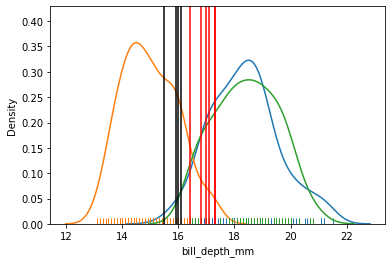

In [14]:
fig, ax = plt.subplots()

# densidades
for s in penguins["species"].unique():
    sns.distplot(penguins[(penguins["species"]==s)]["bill_depth_mm"], rug=True, hist=False, ax=ax)
# individuos mal clasificados
for val,c in zip(bad_predictions["bill_depth_mm"], bad_predictions["Gentoo"]):
    if c == 1:
        # gentoo mal predichos, en rojo
        plt.axvline(x=val, color="red")
    else:
        # predicho como gentoo y no lo era, en negro
        plt.axvline(x=val, color="black")

plt.show()

Se clasificó mal a los pingüinos Gentoo con profundidad de pico lo suficientemente grande como para entrar en la región de solapamiento, y a los pingüinos de otras especies con profundidad de pico lo suficientemente pequeña para caer también en dicha región.

Otra peculiaridad a comentar es que en todas las predicciones donde se clasificó como "Gentoo" y no lo era, los pingüinos eran de sexo masculino, y por el contrario, en los casos donde se clasificó como "no Gentoo" y sí lo era, los pingüinos eran de sexo masculino. <br> 
Pero esto no es particularmente raro, puesto que en la naturaleza suele darse que los individuos de genero masculino, tienen un tamaño mayor que el de sus pares femeninos. <br>
Luego, es de esperarse que si un pingüino de la especie *Gentoo* (que tienen una profundidad de pico pequeña respecto a las otras dos especies) tiene una profundidad de pico lo suficientemente grande comparado con sus pares de especie como para acercarse a los valores tipicos de estas otras dos especies, este sea de sexo masculino. Y análogamente se da el fenómeno inverso.

In [15]:
bad_predictions_full

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Gentoo
97,Adelie,Dream,33.1,16.1,178,2900,female,2008,0
101,Adelie,Biscoe,37.7,16.0,183,3075,female,2009,0
123,Adelie,Torgersen,35.2,15.9,186,3050,female,2009,0
141,Adelie,Dream,32.1,15.5,188,3050,female,2009,0
188,Gentoo,Biscoe,44.4,17.3,219,5250,male,2008,1
216,Gentoo,Biscoe,49.8,16.8,230,5700,male,2008,1
230,Gentoo,Biscoe,45.2,16.4,223,5950,male,2008,1
236,Gentoo,Biscoe,50.8,17.3,228,5600,male,2009,1
240,Gentoo,Biscoe,52.1,17.0,230,5550,male,2009,1
242,Gentoo,Biscoe,52.2,17.1,228,5400,male,2009,1


##### 4b)

Repetir la parte 4a) con el modelo ajustado para la muestra de entrenamiento,
para la muestra test.

In [16]:
gentoo_test_pred = log_reg.predict(exog=test)
gentoo_test_pred_bin = gentoo_test_pred.apply(lambda x: 1 if x>0.5 else 0)

gentoo_test_real_bin = test["Gentoo"]
n_test = gentoo_test_pred_bin.shape[0]

errores_test = (np.abs(gentoo_test_pred_bin - gentoo_test_real_bin)).sum()
porcentaje_error_total_test = 100 * (errores_test/n_test) 

print(f"Error total test = {errores_test}/{n_test} = {porcentaje_error_total_test:.4f}%")

Error total test = 5/68 = 7.3529%


Vemos que el error del conjunto de testeo es casi el doble del error obtenido en el conjunto de entrenamiento, lo que podria indicar un *overfitting* en el modelo entrenado. Sin embargo, este último error tampoco es especialmente elevado como para descartar el modelo sin más pruebas.

### Análisis discriminante en una dimensión

#### 5)
Suponiendo que ambos grupos (Gentoo y no Gentoo) tienen la misma varianza, encontrar el límte entre
las dos distribuciones a partir de un análisis discriminante utilizando la variable bill_depth_mm. Este
límite debe calcularse “a mano” a partir de los parámetros necesarios, que se calcularán a partir de los
datos.

Asumiendo que ambas variables siguen una distribución Normal y suponiendo que los dos grupos conocidos (Gentoo - No Gentoo) tienen la misma varianza, podemos aplicar un Análisis de Discriminante Lineal.

Usando la siguiente ecuación para el LDA en una variable:
\begin{equation}
δ_{k}(x) = x* \frac{μ_{k}}{σ^{2}} - \frac{μ_{k}^{2}}{2σ^{2}} + log(π_{k})
\end{equation}

Luego igualamos ambos discriminantes para hallar el límite de las dos distribuciones:
\begin{equation}
x* \frac{μ_{1}}{σ^{2}} - \frac{μ_{1}^{2}}{2σ^{2}} + log(π_{1}) = x* \frac{μ_{2}}{σ^{2}} - \frac{μ_{2}^{2}}{2σ^{2}} + log(π_{2})
\end{equation}<br>
\begin{equation}
x* \left(\frac{μ_{1}-μ_{2}}{σ^2}\right) = \frac{μ_{1}+μ_{2}}{2} * \frac{μ_{1}-μ_{2}}{σ^2} + log\left(\frac{π_{2}}{π_{1}}\right) * \frac{σ^2}{μ_{1}-μ{2}}
\end{equation}<br>
\begin{equation}
x = \frac{μ_{1}+μ_{2}}{2} + log\left(\frac{π_{2}}{π_{1}}\right) * \frac{σ^2}{μ_{1}-μ{2}}
\end{equation}<br>
Y usando los siguientes estimadores:
\begin{equation}
\hat{π}_{k} = \frac{n_{k}}{n}
\end{equation}
\begin{equation}
\hat{μ}_{k} = \frac{1}{n_{k}} * \sum_{y_{i} \in k} x_{i}
\end{equation}
\begin{equation}
\hat{\sigma}^{2} = \sum_{k=1}^{K} \frac{n_{k}-1}{n-K}* \hat{\sigma_{k}}^{2} \text{ , donde } \hat{\sigma_{k}}^{2} = \frac{1}{n_{k}-1} * \sum_{y_{i} \in k} (x_{i} - \hat{μ}_{k})^2
\end{equation}


In [17]:
gentoo = train[(train["Gentoo"]==1)]
noGentoo = train[(train["Gentoo"]==0)]

# n y n_k
n = train.shape[0]
n_gentoo = gentoo.shape[0]
n_noGentoo = noGentoo.shape[0]

# mu_k
mu_bill_depth_gentoo = (1/n_gentoo) * gentoo["bill_depth_mm"].sum()
mu_bill_depth_noGentoo = (1/n_noGentoo) * noGentoo["bill_depth_mm"].sum()

# pi_k 
pi_gentoo = n_gentoo / n
pi_noGentoo = n_noGentoo / n

# sigma_k
sigma2_gentoo = (1/(n_gentoo-1)) * ((gentoo["bill_depth_mm"] - mu_bill_depth_gentoo)**2).sum()
sigma2_noGentoo = (1/(n_noGentoo-1)) * ((noGentoo["bill_depth_mm"] - mu_bill_depth_noGentoo)**2).sum()
# sigma
sigma2 = ((n_gentoo-1)/(n-2)) * sigma2_gentoo + ((n_noGentoo-1)/(n-2)) * sigma2_noGentoo

from math import log

x_boundary = (mu_bill_depth_gentoo + mu_bill_depth_noGentoo) / 2 + log(pi_noGentoo/pi_gentoo) * ((sigma2) / (mu_bill_depth_gentoo - mu_bill_depth_noGentoo))

print(f"boundary = {x_boundary}")

boundary = 16.441736459483828


#### 6)
Calcular los errores de clasificación en la muestra de entrenamiento y de test y comparar con los
resultados obtenidos en la sección anterior (partes 4a y 4b).

In [18]:
# delta_gentoo(x) = delta_noGentoo(x) cuando x = x_boundary
# luego, si x < x_boundary ==> gentoo = 1
#        sino gentoo = 0

boundary = lambda x: 1 if x < x_boundary else 0

lda_train_pred = train["bill_depth_mm"].apply(boundary) 
lda_test_pred = test["bill_depth_mm"].apply(boundary)

errores_lda_train = (np.abs(lda_train_pred - gentoo_train_real_bin)).sum()
errores_lda_test = (np.abs(lda_test_pred - gentoo_test_real_bin)).sum()

porcentaje_error_total_train = 100 * (errores_lda_train/n_train) 
porcentaje_error_total_test = 100 * (errores_lda_test/n_test) 

print(f"LDA total error for train = {errores_lda_train}/{n} = {porcentaje_error_total_train:.4f}%")
print(f"LDA total error for test = {errores_lda_test}/{n} = {porcentaje_error_total_test:.4f}%")

LDA total error for train = 10/274 = 3.6496%
LDA total error for test = 5/274 = 7.3529%


Sorpresivamente, el error de ambos modelos para ambos conjuntos son idénticos. <br>
Probablemente esto tenga que ver con la simplicidad de los modelos, y se podría ajustar algún paramétro para optimizar los puntos fuertes de cada método. <br>

##### Chequeo boundary con libreria

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

#definir variables de predicción y respuesta
X_lda = train["bill_depth_mm"].values.reshape(-1,1)
y_lda = train["Gentoo"]

#Ajuste el modelo del modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_lda, y_lda)

LinearDiscriminantAnalysis()

In [20]:
epsilon = 0.001
xs = np.array([x_boundary-2*epsilon, x_boundary-epsilon, x_boundary+epsilon, x_boundary+2*epsilon]).reshape(-1,1)
lda.predict(xs)

array([1, 1, 0, 0])

### Clasificación en las tres clases a partir de dos variables

#### 7)
Graficar bill_length_mm en función de flipper_length_mm utilizando diferentes colores para cada especie

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

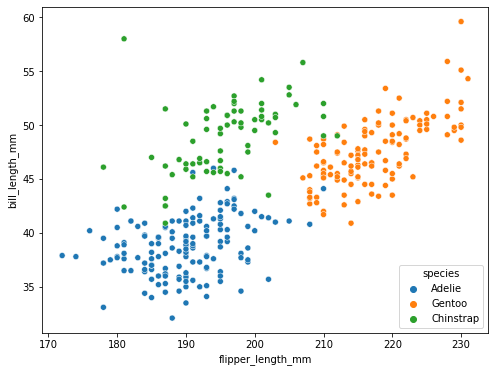

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=penguins_encoded, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=ax)

#### 8)
Deducir las ecuaciones de las rectas que separan a las tres especies usando las ecuaciones del discriminante lineal. Graficar cómo queda dividido el espacio, a partir de las rectas calculadas (puede realizarse
a mano)

De forma similar a la utilizada en la parte 5, pero ahora generalizando para $m$ dimensiones.
Definimos la función de discriminante lineal como :
\begin{equation}
\delta_{k}(x) = x^{T} Σ^{-1} μ_{k} - \frac{1}{2} μ^{T}_{k} Σ^{-1} μ_{k} + log(π_{k})
\end{equation}
Y tenemos que el umbral de decisión entre dos clases k y l es:
\begin{equation}
\text{Boundary_line } = \{ x: \delta_{k}(x) = \delta_{l}(x) \} \\ 
= \{ x : log(\frac{π_{k}}{π_{l}}) - \frac{1}{2}(μ_{k}+μ_{l})^{T}Σ^{-1}(μ_{k}-μ_{l})+x^{T}Σ^{-1}(μ_{k}-μ_{l}) = 0 \}
\end{equation}

http://www.personal.psu.edu/jol2/course/stat597e/notes2/lda.pdf

In [22]:
def b_line(mu, pi, sigma):
  mu_k, mu_l = np.array(mu)
  pi_k, pi_l = np.array(pi)
  # vectores columna
  mu_k = np.array([mu_k]).T
  mu_l = np.array([mu_l]).T

  sigma_inv = np.linalg.inv(sigma)

  # x.T * coef + indep = 0
  indep = log(pi_k/pi_l) - (1/2) * ((mu_k + mu_l).T @ sigma_inv @ (mu_k - mu_l)) 
  coef = sigma_inv @ (mu_k - mu_l)

  return coef, indep

gentoo_train = train[(train["species"]=="Gentoo")]
adelie_train = train[(train["species"]=="Adelie")]
chinstrap_train = train[(train["species"]=="Chinstrap")]

# n_k
n = train.shape[0]
n_gentoo = gentoo_train.shape[0]
n_adelie = adelie_train.shape[0]
n_chinstrap = chinstrap_train.shape[0]
                              
# sigma dado
sigma = np.array([[42.651738, 8.547301],
                  [8.547301,  8.521055]])

# pi_k
pi_gentoo = n_gentoo / n
pi_adelie = n_adelie / n
pi_chinstrap = n_chinstrap / n

# mu_k
mu_gentoo = [(1/n_gentoo) * gentoo_train["flipper_length_mm"].sum(),
             (1/n_gentoo) * gentoo_train["bill_length_mm"].sum()]
mu_adelie = [(1/n_adelie) * adelie_train["flipper_length_mm"].sum(),
             (1/n_adelie) * adelie_train["bill_length_mm"].sum()]
mu_chinstrap = [(1/n_chinstrap) * chinstrap_train["flipper_length_mm"].sum(),
                (1/n_chinstrap) * chinstrap_train["bill_length_mm"].sum()]

In [23]:
boundaries = [ b_line([mu_chinstrap, mu_adelie], [pi_chinstrap, pi_adelie], sigma), 
               b_line([mu_gentoo, mu_chinstrap], [pi_gentoo, pi_chinstrap], sigma),
               b_line([mu_gentoo, mu_adelie], [pi_adelie, pi_gentoo], sigma)]

In [24]:
lines = []
pairs=[("Chinstrap","Adelie"), ("Gentoo","Chinstrap"), ("Gentoo","Adelie")]
for boundary,s in zip(boundaries,pairs):
  coef2 = boundary[0][1][0]
  coef1 = boundary[0][0][0]
  indep = boundary[1][0][0]

  print("="*37, f"{s[0]}-{s[1]} boundary", "="*37,"\n",
    f"Ec. Implicita : \n\t (flipper_length_mm)*{coef1:.4f} + (bill_length_mm)*{coef2:.4f} + {indep:.4f} = 0")
  
  # x.T * coef + indep = 0
  # x1 * coef1 + x2 * coef2 + indep = 0
  # (x1 * coef1 + indep)/-coef2 = x2
  coef = coef1 / -coef2
  indep = indep / -coef2
  lines.append([coef, indep])

  print(f"Ec. Explicita : \n\t bill_length_mm = (flipper_length_mm)*{coef:.4f} + {indep:.4f}\n","="*100,"\n")

===================================== Chinstrap-Adelie boundary ===================================== 
 Ec. Implicita : 
	 (flipper_length_mm)*-0.1078 + (bill_length_mm)*1.3004 + -37.0697 = 0
Ec. Explicita : 
	 bill_length_mm = (flipper_length_mm)*0.0829 + 28.5067

===================================== Gentoo-Chinstrap boundary ===================================== 
 Ec. Implicita : 
	 (flipper_length_mm)*0.6546 + (bill_length_mm)*-0.8467 + -93.7590 = 0
Ec. Explicita : 
	 bill_length_mm = (flipper_length_mm)*0.7731 + -110.7369

===================================== Gentoo-Adelie boundary ===================================== 
 Ec. Implicita : 
	 (flipper_length_mm)*0.5467 + (bill_length_mm)*0.4537 + -130.3905 = 0
Ec. Explicita : 
	 bill_length_mm = (flipper_length_mm)*-1.2051 + 287.3928



In [25]:
from numpy import dot, empty_like
def perp( a ) :
    b = empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b
def seg_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = dot( dap, db)
    num = dot( dap, dp )
    return (num / denom.astype(float))*db + b1

line0, line1, line2 = lines
# p1 y p2 son puntos de line0=chinstrap_adelie
# p1=(0,coef2) p2=(1,coef2+coef1)
p1 = np.array( [0, line0[1]] )
p2 = np.array( [1, line0[0]+line0[1]] )
# analogo p3 y p4 para line1=gentoo_chinstrap
p3 = np.array( [0, line1[1]] )
p4 = np.array( [1, line1[0]+line1[1]] )

interseccion = seg_intersect(p1,p2,p3,p4)
interseccion

array([201.7500284 ,  45.23228787])

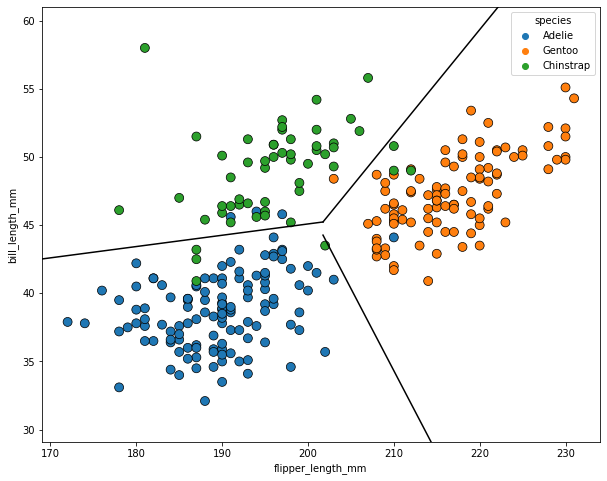

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
# longitud de los ejes
f = train["flipper_length_mm"]
b = train["bill_length_mm"]
plt.xlim([f.min()-3, f.max()+3])
plt.ylim([b.min()-3, b.max()+3])

# puntos
sns.scatterplot(data=train, x="flipper_length_mm", y="bill_length_mm", hue="species", edgecolor="black", s=80, ax=ax)

# dominio donde graficar las rectas
# asi logramos que lleguen hasta donde nos interesa, que es el punto de interseccion hallado arriba
may = np.linspace(interseccion[0], f.max()+50, 100).reshape(-1,1)
men = np.linspace(f.min()-50, interseccion[0], 100).reshape(-1,1)
dom = [men, may, may]

# limites de decision
for line, xs in zip(lines, dom):
    coef, indep = line
    ax.plot(xs, xs*coef + indep, color="black")
    
plt.show()

##### con libreria

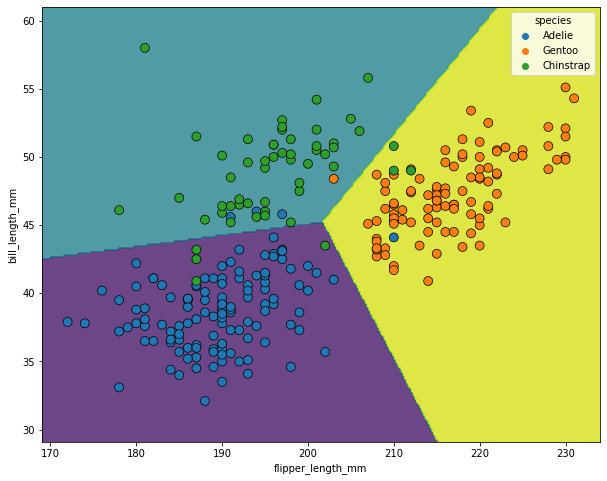

In [27]:
from sklearn.inspection import DecisionBoundaryDisplay

X_train = train[["flipper_length_mm", "bill_length_mm"]]

lda_byf = LinearDiscriminantAnalysis()
lda_byf = lda_byf.fit(X_train, train["species"])

# grafica con limites de decision del arbol
fig, ax = plt.subplots(figsize=(10,8))
f = train["flipper_length_mm"]
b = train["bill_length_mm"]
plt.xlim([f.min()-3, f.max()+3])
plt.ylim([b.min()-3, b.max()+3])

disp = DecisionBoundaryDisplay.from_estimator(
    lda_byf, X_train, response_method="predict",
    xlabel="flipper_length_mm", ylabel="bill_length_mm",
    alpha=0.8,
    eps=20, 
    ax=ax,
    grid_resolution=500
)

sns.scatterplot(data=train, x="flipper_length_mm", y="bill_length_mm", hue="species", edgecolor="black", s=80, ax=ax)

plt.show()

#### 9)
Ajustar un árbol de clasificación para predecir la especie a partir de las variables flipper_length_mm,bill_length_mm.
Dibujar en la gráfica las fronteras determinadas por los árboles (esta gráfica también puede realizarse
a mano)

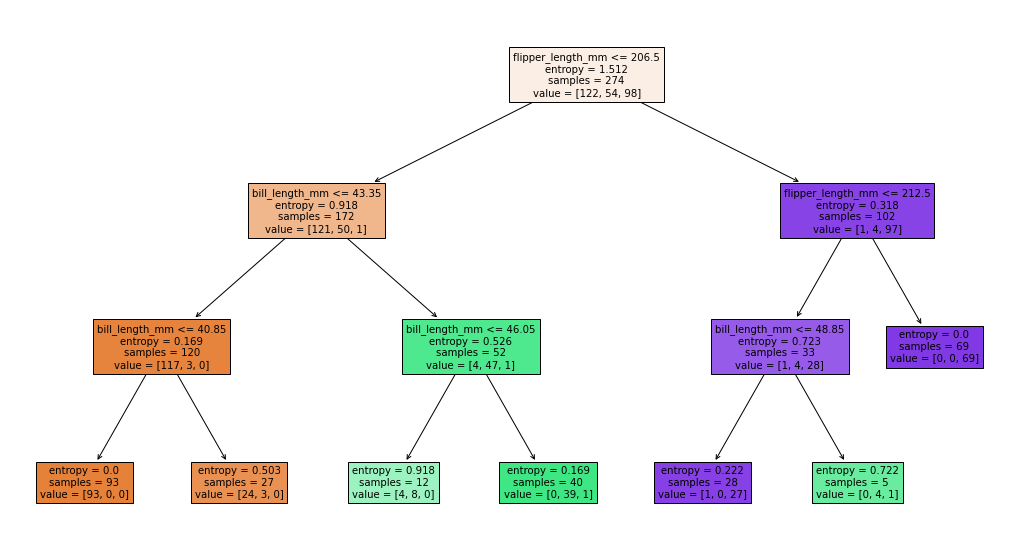

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

var_indep = ["flipper_length_mm","bill_length_mm"]

X_train = train[var_indep]
y_train = train["species"]

clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=3, random_state=1)
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(18,10))
plot_tree(
    decision_tree=clf,
    feature_names=var_indep,
    filled=True
)
plt.show()

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

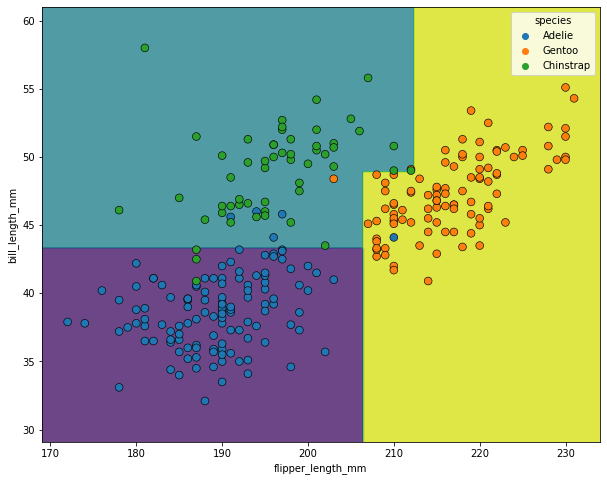

In [29]:
from sklearn.inspection import DecisionBoundaryDisplay

# grafica con limites de decision del arbol
fig, ax = plt.subplots(figsize=(10,8))
f = train["flipper_length_mm"]
b = train["bill_length_mm"]
plt.xlim([f.min()-3, f.max()+3])
plt.ylim([b.min()-3, b.max()+3])

disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_train, response_method="predict",
    xlabel="flipper_length_mm", ylabel="bill_length_mm",
    alpha=0.8,
    eps=20, 
    ax=ax,
    grid_resolution=500
)

sns.scatterplot(data=train, x="flipper_length_mm", y="bill_length_mm", hue="species", edgecolor="black", s=60, ax=ax)

#### 10)
Calcular los errores de clasificación en las muestras de entrenamiento y test para ambos modelos y discutir cuál de los modelos le parece más adecuado para la tarea de clasificación de ambas especies

In [30]:
X_test = test[var_indep]
y_test = test["species"]

# predicciones sobre train y test sets para el arbol
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# predicciones sobre train y test sets para lda
y_train_lda_pred = lda_byf.predict(X_train)
y_test_lda_pred = lda_byf.predict(X_test)

In [31]:
# calculo de los errores

# cantidad de observaciones
n_train = train.shape[0]
n_test = test.shape[0]

# contador de errores
errores_test = 0
for pred, real in zip(y_test_pred, y_test.values):
  if pred != real:
    errores_test += 1
errores_train = 0
for pred, real in zip(y_train_pred, y_train.values):
  if pred != real:
    errores_train += 1

# calculo error total
porcentaje_error_total_test = 100 * (errores_test/n) 
porcentaje_error_total_train = 100 * (errores_train/n) 

print("Arbol de Clasificacion:")
print(f"Error total en train = {errores_train}/{n_train} = {porcentaje_error_total_train:.4f}%")
print(f"Error total en test = {errores_test}/{n_test} = {porcentaje_error_total_test:.4f}%")

Arbol de Clasificacion:
Error total en train = 10/274 = 3.6496%
Error total en test = 3/68 = 1.0949%


In [32]:
# contador de errores
errores_test = 0
for pred, real in zip(y_test_lda_pred, y_test.values):
  if pred != real:
    errores_test += 1
errores_train = 0
for pred, real in zip(y_train_lda_pred, y_train.values):
  if pred != real:
    errores_train += 1

# calculo error total
porcentaje_error_total_test = 100 * (errores_test/n) 
porcentaje_error_total_train = 100 * (errores_train/n) 

print("LDA:")
print(f"Error total en train = {errores_train}/{n_train} = {porcentaje_error_total_train:.4f}%")
print(f"Error total en test = {errores_test}/{n_test} = {porcentaje_error_total_test:.4f}%")

LDA:
Error total en train = 12/274 = 4.3796%
Error total en test = 3/68 = 1.0949%


Si bien el modelo LDA obtuvo un error superior sobre el training set que el obtenido por el Árbol de Clasificación, el obtenido sobre el set de testeo es igual. <br>
Al no haber mucha diferencia en los errores de los modelos obtenidos no tenemos bases prácticas claras para elegir uno sobre otro. <br>
<br>
Sin embargo, podemos teorizar que en este caso en particular (observando nuevamente los gráficos de nubes de puntos), es más sencillo en la mayoría de los casos separar dichas nubes con rectas diagonales, y esto lo consigue el modelo LDA. Por el otro lado, los Árboles de Clasificación obtienen límites exclusivamente horizontales y verticales (no todos, pero sí el utilizado en este caso) por lo que, en tales situaciones, tendrán el trabajo más complicado. <br>
De esta misma idea, deriva la observación de que para datos con nubes circulares probablemente los árboles tengan el trabajo más fácil pues suele ser más sencillo separar nubes circulares mediante ángulos rectos que mediante 3 líneas diagonales.
> Nota: Esto último mencionado es solo una idea y no fue probado de ninguna forma. Por lo que la misma puede ser incorrecta.

In [33]:
from scipy import stats
alpha = 1e-3

vars = ["flipper_length_mm","bill_length_mm"]

# null hypothesis: x comes from a normal distribution
for v in vars:
    k2, p = stats.normaltest(train[v])
    print("p = {:g}".format(p))
    if p < alpha:  
        print(f"The null hypothesis can be rejected for variable: {v}")
    else:
        print(f"The null hypothesis cannot be rejected for variable: {v}")

p = 3.13759e-11
The null hypothesis can be rejected for variable: flipper_length_mm
p = 5.93969e-10
The null hypothesis can be rejected for variable: bill_length_mm


Otra aproximación posible sobre cual modelo elegir para este caso, es realizar un test sobre la normalidad de las variables pues LDA asume tal hipótesis (no se considera Fischer's LDA, que no hace uso de dicha hipótesis). De todas formas, en la práctica los modelos LDA tampoco performan mal aunque esta hipótesis no se cumpla, como fue visto en este mismo caso.


<br>
https://en.wikipedia.org/wiki/Linear_discriminant_analysis#Fisher's_linear_discriminant

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# creacion de los folds
skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)

for model, model_name in zip([clf, lda_byf], ["Arbol de Clasificacion", "LDA"]):
    for xs, ys, set_name in zip(
            [X_train, X_test, penguins_encoded[["flipper_length_mm","bill_length_mm"]]], 
            [y_train, y_test, penguins_encoded["species"]],
            ["Train", "Test", "Full"]
        ):
        scores = cross_val_score(model, xs, ys, cv=skf, scoring="accuracy")
        print(f"{model_name} Mean Accuracy {set_name}: {np.mean(scores):.4f}, {np.std(scores):.4f}")


Arbol de Clasificacion Mean Accuracy Train: 0.9602, 0.0391
Arbol de Clasificacion Mean Accuracy Test: 0.9638, 0.0824
Arbol de Clasificacion Mean Accuracy Full: 0.9357, 0.0405
LDA Mean Accuracy Train: 0.9923, 0.0158
LDA Mean Accuracy Test: 0.9900, 0.0364
LDA Mean Accuracy Full: 0.9561, 0.0345


Por otro lado, evaluando los modelos sobre las diferentes particiones (train-test-full) del conjunto de datos y reiteradas veces, vemos que en promedio el modelo LDA ofrece mejores resultados. <br>
Por lo que en la práctica este parece ser el más adecuado para nuestra combinación: datos-problema.

### Clasificación en las tres clases a partir de las variables y sexo

#### 11) 
Ajustar un árbol de clasificación a partir de todas las variables de medidas (pico, ala y peso) y el sexo.
Calcular los errores de predicción en el conjunto de entrenamiento y de test. Comparar con los modelos
obtenidos en la sección anterior.

In [36]:
one_hot_enc = lambda x: 1 if x=="male" else 0

In [37]:
train_encoded = train
new_values = train["sex"].apply(one_hot_enc)
train_encoded["sex"] = new_values

In [38]:
test_encoded = test
new_values = test["sex"].apply(one_hot_enc)
test_encoded["sex"] = new_values

In [39]:
train_encoded.iloc[:5,:]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Gentoo
1,Adelie,Torgersen,39.5,17.4,186,3800,0,2007,0
2,Adelie,Torgersen,40.3,18.0,195,3250,0,2007,0
3,Adelie,Torgersen,36.7,19.3,193,3450,0,2007,0
4,Adelie,Torgersen,39.3,20.6,190,3650,1,2007,0
5,Adelie,Torgersen,38.9,17.8,181,3625,0,2007,0


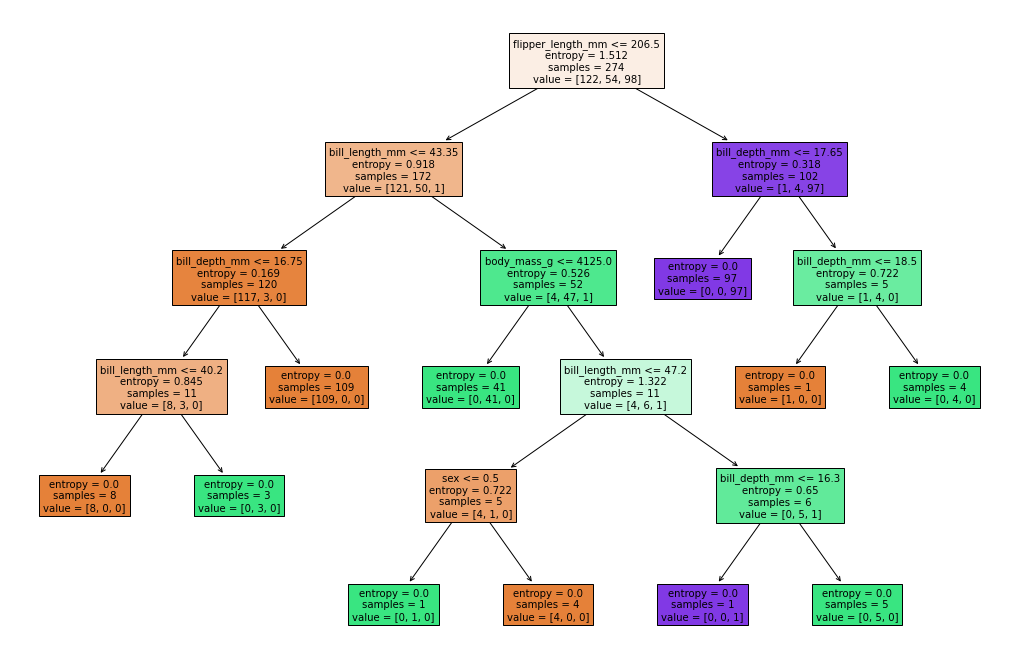

In [40]:
var_indep = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]

X_train = train_encoded[var_indep]
y_train = train_encoded["species"]

clf = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=1)
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(18,12))
plot_tree(
    decision_tree=clf,
    feature_names=var_indep,
    filled=True
)
plt.show()

In [41]:
X_test = test_encoded[var_indep]
y_test = test_encoded["species"]

# predicciones sobre train y test sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [42]:
# calculo de los errores

# cantidad de observaciones
n_train = train.shape[0]
n_test = test.shape[0]

# contador de errores
errores_test = 0
for pred, real in zip(y_test_pred, y_test.values):
  if pred != real:
    errores_test += 1
errores_train = 0
for pred, real in zip(y_train_pred, y_train.values):
  if pred != real:
    errores_train += 1

# calculo error total
porcentaje_error_total_test = 100 * (errores_test/n) 
porcentaje_error_total_train = 100 * (errores_train/n) 

print(f"Error total en train = {errores_train}/{n_train} = {porcentaje_error_total_train:.4f}%")
print(f"Error total en test = {errores_test}/{n_test} = {porcentaje_error_total_test:.4f}%")

Error total en train = 0/274 = 0.0000%
Error total en test = 3/68 = 1.0949%


Este modelo presenta un menor error total que los modelos presentados anteriormente, pero es necesario considerar el aumento en la complejidad del mismo. Este modelo toma en cuenta una mayor cantidad de variables, y habría que evaluar si realmente este último logra generalizar mejor que los anteriores o simplemente alcanza mejores resultados debido a que logró adaptarse mejor a los datos de entrenamiento gracias a la mayor flexibilidad que le otorgan los paramétros extra.